## Unsupervised Learning - Clustering

Unsupervised learning - this is type of learning when we don't have target value. Model just takes some data and it should find some different patterns. The most common problem of unsupervised learning is clustering. We use clastering when we want to make some clasters from similar data points. For example:
* Market segmentation - when we want to create clusters for similar customers.
* Image segmentation - create clusters of some pixels and divide some objects on picture.
* Anomaly detection - data points that are far from others after clusterization can be considered as anomalies/outliers and we can delete them.

As we don't have a target value in unsupervised learning, it's hard to estimate a model. There are some evaluation criterias, however, which criterion is important for a particular task is up to the user to decide.

The main goal of clusterization is to make clusters from similar data points and for this we want to define what is __similar__. There are lots of similarity measures, we can consider them as distance between data points. If this distance is small, data points are more similar. Mostly common used similarity measures:  
* Euclidean distance - distance between two points, it's very simple - distance that we generally use in geometry:
$$ D_{A, B} = \sqrt { \sum_{i=1}^{m} (A_i-B_i)^2 } $$ 
$D_{A, B}$ - eucleadian distance betweem $A$ and $B$ points. $A_i$ and $B_i$ are the coordinates of $A$ and $B$, $m$ - dimension of point (for machine learning problems - number of features)
* Cosine distance - cosine of the angle between two vectors.
$$ D_{\vec u, \vec v} = \frac {\vec u \cdot \vec v}{\lvert \lvert \vec u \rvert \rvert \ \lvert \lvert \vec v \rvert \rvert} $$  
vector scalar product is $ \vec u \cdot \vec v = \lvert \lvert \vec u \rvert \rvert \ \lvert \lvert \vec v \rvert \rvert \ \cos \alpha $, where $\alpha$ is angle between vectors. Also vector scalar product is $\vec u \cdot \vec v$ so we can get this formula:
$$ D_{\vec u, \vec v} = \frac {\sum_{i=1}^{m} u_i v_i}{\lvert \lvert \vec u \rvert \rvert \ \lvert \lvert \vec v \rvert \rvert} $$  
* Jaccard similarity - this is used to estimate similarity between sets and it's Intersection over Union:
$$ D_{A, B} = \frac {\lvert A \cap B \rvert}{\lvert A \cup B \rvert} $$  
* Manhattan distance - what is distance to get from point A to point B if we are allowed to move only on lines(not on diagonals):
$$ D_{A, B} = { \sum_{i=1}^{m} \lvert A_i-B_i \rvert  } $$

[for visualization of manhattan distance you can see this link](https://www.researchgate.net/profile/Jose-Martinez-245/publication/343237167/figure/fig24/AS:917936684404746@1595864568479/Euclidean-and-Manhattan-distance-comparison-3235-Optimizations-The-first-optimization.png)


### K-Means

K-Means is very popular clustering algorithm. It 's __exclusive__ clustering algorithm, each point is assigned to only one cluster. It uses eucledian distance to mesure similarity(but we can use other similarity measure if we want). We get $k$ cluster using this algorithm and we should define $k$ before we run the algorithm. Algorithm: 

**Step 1:** We choose $k$ number center (we can choose this points randomly but in general we get better result if we choose some real points randomly as centers)


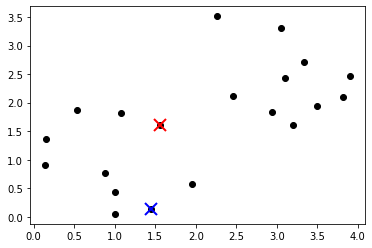

In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(7) 

# Random Data
x1 = np.random.rand(10)*2
y1 = np.random.rand(10)*2
x2 = np.random.rand(10)*2 + 2
y2 = np.random.rand(10)*3 + 1

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
plt.plot(x, y, 'ko') 

# Choose cluster centers randomly and mark them with blue and red X-s.
blue_ind, red_ind = np.random.choice(np.arange(x.shape[0]), 2)
blue_center = np.array([x[blue_ind], y[blue_ind]])
red_center = np.array([x[red_ind], y[red_ind]])

plt.plot(blue_center[0], blue_center[1], 'bx', red_center[0], red_center[1], 'rx', markeredgewidth=2, markersize=12)
plt.show()

**Step 2:** We calculate distances from each point to centers and each point is assigned to a closer cluster 

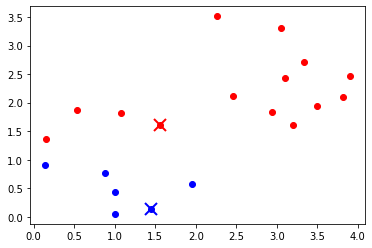

In [7]:
# Let's calculate distance^2 as it doesn't matter in our case
dist_blue = (x - blue_center[0])**2 + (y - blue_center[1])**2 
dist_red = (x - red_center[0])**2 + (y - red_center[1])**2

# for each point we determine which cluster center is closer (0-blue, 1-red)
clusters = np.argmin(np.column_stack((dist_blue, dist_red)), axis=1)  

# visualization
plt.plot(x[clusters == 0], y[clusters == 0], 'bo', x[clusters == 1], y[clusters == 1], 'ro')
plt.plot(blue_center[0], blue_center[1], 'bx', red_center[0], red_center[1], 'rx', markeredgewidth=2, markersize=12)
plt.show()

**Step 3:** we calculate new center for each cluster using points that belongs to this cluster

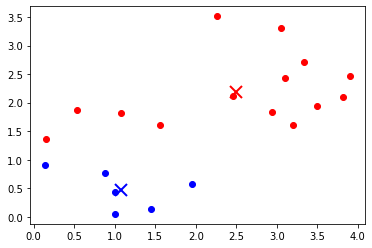

In [8]:
blue_center = np.array([x[clusters == 0].mean(), y[clusters == 0].mean()])
red_center = np.array([x[clusters == 1].mean(), y[clusters == 1].mean()])

plt.plot(x[clusters == 0], y[clusters == 0], 'bo', x[clusters == 1], y[clusters == 1], 'ro')
plt.plot(blue_center[0], blue_center[1], 'bx', red_center[0], red_center[1], 'rx', markeredgewidth=2, markersize=12)
plt.show()

we repeat step 2 with new cluster centers:

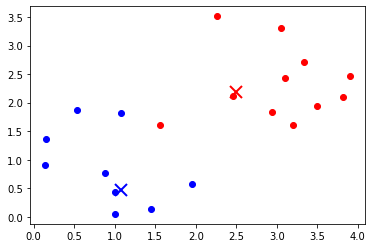

In [9]:
dist_blue = (x - blue_center[0])**2 + (y - blue_center[1])**2 
dist_red = (x - red_center[0])**2 + (y - red_center[1])**2  

clusters = np.argmin(np.column_stack((dist_blue, dist_red)), axis=1)  

plt.plot(x[clusters == 0], y[clusters == 0], 'bo', x[clusters == 1], y[clusters == 1], 'ro')
plt.plot(blue_center[0], blue_center[1], 'bx', red_center[0], red_center[1], 'rx', markeredgewidth=2, markersize=12)
plt.show()

We repeat steps 2 and 3 before convex and we stop when cluster center coordinates are not changed anymore.
We see on visualization that we are very close to our goal after only two iterations and maybe one more iteration will be enough to get convex.
If on any step we get empty cluster, we can eliminate it and we'll get $k-1$ cluster(this happens very rarely)

We should know that K-means doesn't always find global optimum, we may get different result for different initial cluster centers so very often people run this algorithm several times and they choose the best one. We choose the best one using cost function:  
$$ J = \frac {1}{n} \sum_{i=1}^{n} \lvert \lvert x_i - \mu_{c_i} \rvert \rvert $$

სადაც  
* $n$ - number of data points
* $x_i$ - $i$th point
* $c_i$ - cluster index of $i$th point   
* $\mu_i$ - center of $i$th cluster 
* $\mu_{c_i}$ - center of the cluster for $i$th point

We can say that cost function is the average of the squares of the distances from the centers of their own clusters of points and we are trying to minimize it.

_How do we choose $k$(number of clusters)?_

The higher the number of clusters means the lower the cost (if the number of data points is equal to the number of clusters, than cost is $0$, because all points will be the cluster itself). Very common practice is to use [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.). You can also try different number of clusters and choose the best one. There are some other methods too to choose K.

We can implement this algorithm using `KMeans` class from `sklearn.cluster` module. We should pass `n_clusters` - number of clusters. By default it does center initialization so that it convexes soon(we can choose centers randomly if we want).

In [10]:
from sklearn.cluster import KMeans

X = np.column_stack((x, y)) 
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

The distribution of points in clusters is stored in the `labels_` attribute

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Visualization:

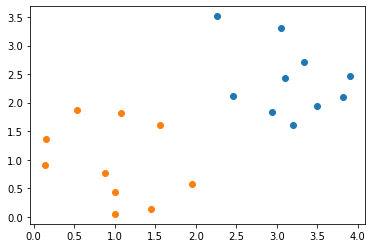

In [12]:
clusters = kmeans.labels_
for i in range(len(np.unique(clusters))):
    plt.scatter(x[clusters == i], y[clusters == i])
plt.show()

We see that it found clusters perfectly.

## KNN

We have clustering algorithms in supervised learning too and most common one is KNN (K Nearest Neighbours). It's very simple algorithm:
* We have data points with target values
* We choose $k$
* for each new data point we calculate the distance between this new point and every other point and we choose $k$ number nearest neighbours.
* We look at our chosen k neighbour and we choose the most frequent class(mode), this is the class for our new data point.

We can use KNN not only for classification but for regression too(we'll take average value instead of mode on the last step).
We should know that as we increase number of data points, evaluation time increases because algorithm calculates distances for each point.

_How do we choose $k$?_  
It's much simplier to choose $k$ for KNN rather than for KMeans because we know how to estimate our model. Model is better when our accuracy is higher(or MSE is lower for regression tasks).
Also:
* If we choose very small $k$, accuracy will be lower because choosing cluster using only $1$ or $2$ neighbour isn't a good idea, in such case anomalies may have a big effect.
* If $k$ is too big than we may consider points that are too far and we still get a low accuracy. 
* In the case of binary classification, we choose odd $k$ so that we can not get the same number of nearest neighbors of the same class.

So we just try several different values of $k$ and choose the best one.

We have `KNeighborsClassifier` and `KNeighborsRegressor` classes in `sklearn.neighbors` module. Let's consider classification example:

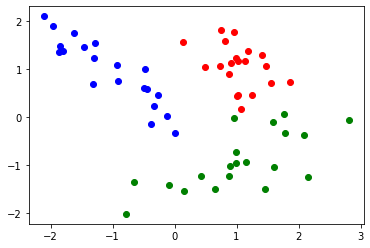

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=60, n_classes=3, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=25)

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')
plt.show()

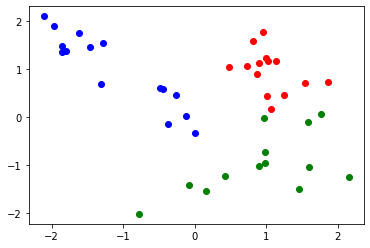

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'bo', 
         X_train[y_train==1, 0], X_train[y_train==1, 1], 'ro', 
         X_train[y_train==2, 0], X_train[y_train==2, 1], 'go')
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

1.0

we got 100% accuracy because classes were distributed too simple, for harder dataset we'll get less score

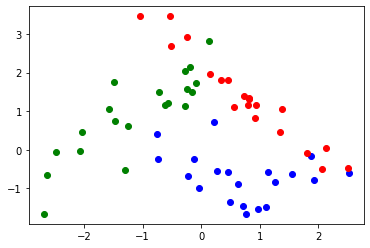

In [16]:
X, y = make_classification(n_samples=60, n_classes=3, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=2)

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')
plt.show()

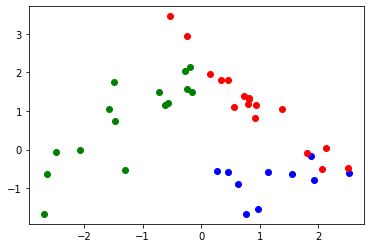

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'bo', 
         X_train[y_train==1, 0], X_train[y_train==1, 1], 'ro', 
         X_train[y_train==2, 0], X_train[y_train==2, 1], 'go')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.7777777777777778

we got 78% accuracy for $k=3$, let's try different $k$:

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.7222222222222222

we got even worse result with $k=5%

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.8333333333333334

We got pretty good result with $k=4$. We have $18$ data points in our test set and $83%$ means that we correctly guessed $15$ data points and it's quite good result.

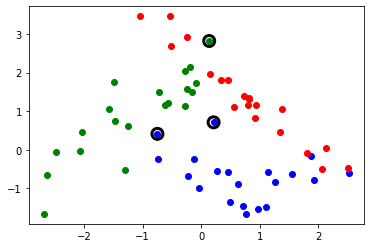

In [21]:
pred = knn.predict(X_test)
diff = (y_test != pred)  # incorrectly classified points

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')

plt.scatter(X_test[diff, 0], X_test[diff, 1], s=120, edgecolors='black',
            facecolors='none', linewidths=3)
plt.show()

Incorrectly classified points are really hard to guess because they are closer to other clusters